<a href="https://colab.research.google.com/github/evp11/Personal-website/blob/main/Laboratory_exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [384]:
data = pd.read_csv('pollution_dataset.csv')
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [386]:
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


In [388]:
data.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [389]:
X, y = data.drop(columns=["Air Quality"]), data["Air Quality"]

In [390]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [392]:
def build_model(layers, activations, input_dim):
    model = Sequential()
    for i, (neurons, activation) in enumerate(zip(layers, activations)):
        if i == 0:
            model.add(Dense(neurons, activation=activation, input_dim=input_dim))
        else:
            model.add(Dense(neurons,activation=activation))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [393]:
model_1 = build_model(layers=[32, 16], activations=['relu', 'relu'], input_dim=X_train.shape[1])
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5808 - loss: 1.1224 - val_accuracy: 0.7925 - val_loss: 0.6073
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 0.5224 - val_accuracy: 0.8687 - val_loss: 0.3856
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8818 - loss: 0.3414 - val_accuracy: 0.8963 - val_loss: 0.2994
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8898 - loss: 0.2888 - val_accuracy: 0.9087 - val_loss: 0.2555
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.2326 - val_accuracy: 0.9062 - val_loss: 0.2426
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9270 - loss: 0.2066 - val_accuracy: 0.9237 - val_loss: 0.2123
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9251 - loss: 0.1989 - val_accuracy: 0.9225 - val_loss: 0.2002
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9263 - loss: 0.1887 - val_accuracy: 0.9212 - val_

In [394]:
model_2 = build_model(layers=[64, 32, 16], activations=['tanh', 'relu', 'relu'], input_dim=X_train.shape[1])
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4133 - loss: 1.1520 - val_accuracy: 0.8188 - val_loss: 0.5245
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8540 - loss: 0.4168 - val_accuracy: 0.9187 - val_loss: 0.2614
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9275 - loss: 0.2241 - val_accuracy: 0.9125 - val_loss: 0.2105
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9314 - loss: 0.1888 - val_accuracy: 0.9287 - val_loss: 0.1747
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9355 - loss: 0.1666 - val_accuracy: 0.9237 - val_loss: 0.1886
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9345 - loss: 0.1718 - val_accuracy: 0.9362 - val_loss: 0.1647
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9434 - loss: 0.1529 - val_accuracy: 0.9375 - val_loss: 0.1676
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9398 - loss: 0.1451 - val_accuracy: 0.

In [395]:
model_3 = build_model(layers=[128, 64, 32, 16], activations=['relu', 'relu', 'relu', 'relu'], input_dim=X_train.shape[1])
history_3 = model_3.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5925 - loss: 0.9279 - val_accuracy: 0.9000 - val_loss: 0.3126
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9069 - loss: 0.2529 - val_accuracy: 0.9013 - val_loss: 0.2180
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9123 - loss: 0.2029 - val_accuracy: 0.9087 - val_loss: 0.1999
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9241 - loss: 0.1802 - val_accuracy: 0.9212 - val_loss: 0.1859
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9390 - loss: 0.1550 - val_accuracy: 0.9350 - val_loss: 0.1797
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9383 - loss: 0.1612 - val_accuracy: 0.9137 - val_loss: 0.1955
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9298 - loss: 0.1618 - val_accuracy: 0.9275 - val_loss: 0.1729
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9439 - loss: 0.1312 - val_accuracy: 0.

In [396]:
print("Model 1 Performance")
model_1_eval = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {model_1_eval[1]:.2f}")

Model 1 Performance
Accuracy: 0.94


In [397]:
print("Model 2 Performance")
model_2_eval = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {model_2_eval[1]:.2f}")

Model 2 Performance
Accuracy: 0.95


In [398]:
print("Model 3 Performance")
model_3_eval = model_3.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {model_3_eval[1]:.2f}")

Model 3 Performance
Accuracy: 0.95


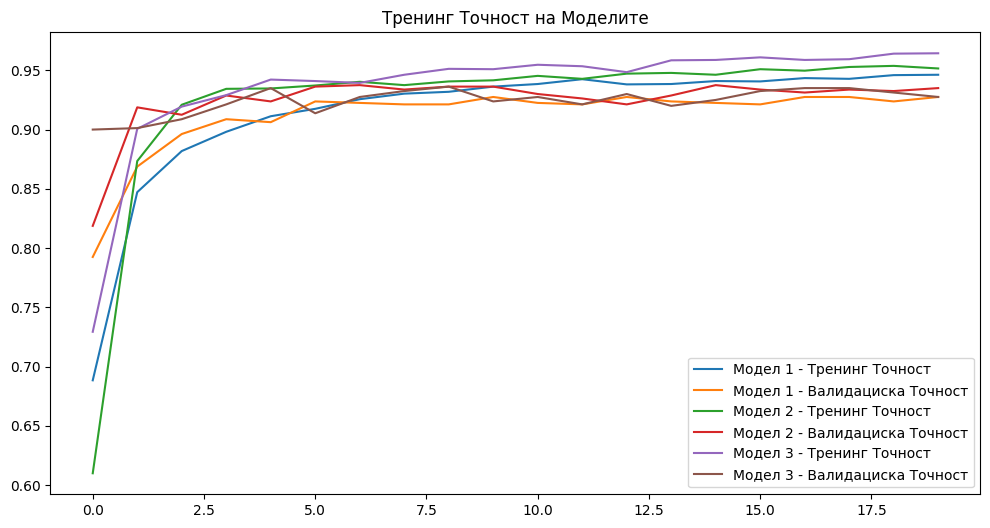

In [402]:
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['accuracy'], label='Модел 1 - Тренинг Точност')
plt.plot(history_1.history['val_accuracy'], label='Модел 1 - Валидациска Точност')
plt.plot(history_2.history['accuracy'], label='Модел 2 - Тренинг Точност')
plt.plot(history_2.history['val_accuracy'], label='Модел 2 - Валидациска Точност')
plt.plot(history_3.history['accuracy'], label='Модел 3 - Тренинг Точност')
plt.plot(history_3.history['val_accuracy'], label='Модел 3 - Валидациска Точност')

plt.legend()
plt.title('Тренинг Точност на Моделите')
plt.show()

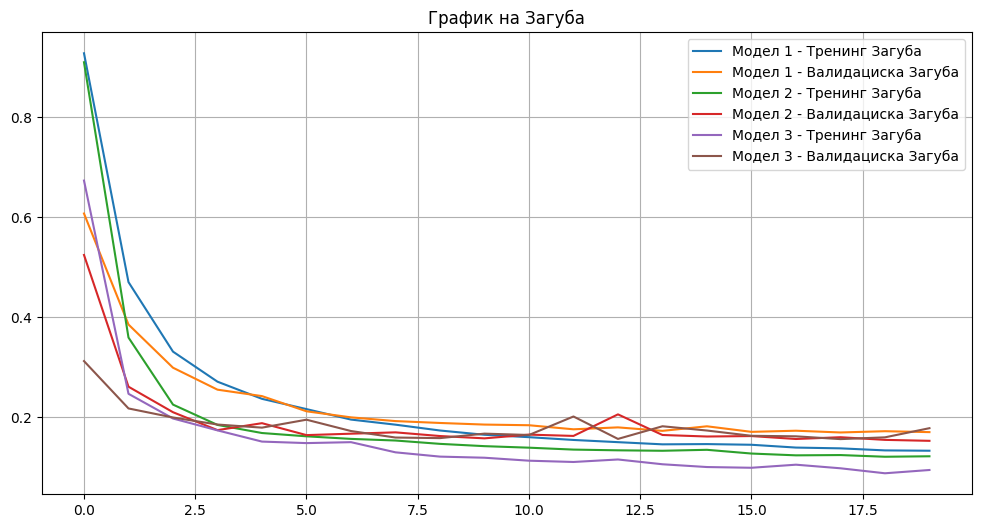

In [406]:
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['loss'], label='Модел 1 - Тренинг Загуба')
plt.plot(history_1.history['val_loss'], label='Модел 1 - Валидациска Загуба')
plt.plot(history_2.history['loss'], label='Модел 2 - Тренинг Загуба')
plt.plot(history_2.history['val_loss'], label='Модел 2 - Валидациска Загуба')
plt.plot(history_3.history['loss'], label='Модел 3 - Тренинг Загуба')
plt.plot(history_3.history['val_loss'], label='Модел 3 - Валидациска Загуба')

plt.title('График на Загуба')
plt.legend()
plt.grid(True)
plt.show()


Модел 2 е најдобар според перформансите и стабилноста, најбрзо намалување на загубата.
Модел 3 нуди највисока тренинг точност, загубата се намалува стабилно, но со малку побавна брзина во споредба со Модел 2.
Модел 1 може да се подобри со прилагодување на неговата архитектура